In [2]:
# This is version 3.20 for smFISH analysis
# This code is created by Elias(Qingxu) Guan from Chrsitian Petersen lab. 
# Before using please make sure: 
# Either install everything following readme 
# Follow the following instructions. 
# For windows and linux user
# 1: make sure you create a unique enviornemnt 
# 2: Make sure you have stardist and bigfish/fishquant installed. 
# For apple and apple silicon user: 
# 1. Make sure you create a unique enviornment. 
# 2. If you dont have brew, make sure follow brew instructions and install brew
# 3. Set up c++ complier 
# if you are using apple silicon
# 1. Install stardist following stardist's instruction. 
# 2. Make sure you have installed tensorflow as instructed on tensorflow website. 
# 3. Make sure you have compatible version. https://pypi.org/project/tensorflow-metal/ Here is where you should go. 

In [14]:
# Setting up Your Conditions
# Setting Path
# If you want to Run your code Please change directories here
controlDirectory = "/Volumes/Backup Plus/Experiment_results/306_analysis_results_alter/Control"
experimentDirectory = "/Volumes/Backup Plus/Experiment_results/306_analysis_results_alter/Experiment" 
customFileName = "633.tif"
counterstainDirectory = "/Volumes/Backup Plus/Experiment_results/306_analysis_results_alter/Experiment" 
counterstainFileName = "633.tif"

In [2]:
# Setting parameters
kernel_size = (1,1.5,1.5)
# Set the voxel size. This is determined by the pixel size of your microscope. Please contact microscopt manufactuer and convert resolution to voxel size. 
# unit is nm, please change to nm and note this should be the same for control and your experimental image. 
# I specifically allow this code to run different voxel size for control and experimental image, but for a good experiment you should not do it like that. 
control_voxel_size = (361,75,75)
voxel_size = (361,75,75)
minimal_distance = (2,2,2)
# Set the spot size as your expected spot size 
spot_size = (600, 300, 300)
saveSpotInformation = True
counterstain = False 

In [3]:
# Importing packages 
import glob
import os 
import bigfish.detection 
import bigfish.plot
import tifffile
from tqdm import tqdm
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
# Here load functions 
# Function1 : Finding all file path

def find_tif_files(directory, pattern="565.tif"):
    matches = []
    for root, dirs, files in os.walk(directory):
        # Skip hidden directories
        dirs[:] = [d for d in dirs if not d.startswith('.')]
        for file in files:
            # Skip hidden files
            if file.startswith('.'):
                continue
            if file.endswith(pattern):
                matches.append(os.path.join(root, file))
    return matches
def create_folder_in_same_directory(file_path, folder_name):
    """
    Creates a folder with the specified name in the same directory as the given file.
    If the folder already exists, it returns the existing path.
    """
    # Get the directory of the given file
    directory = os.path.dirname(file_path)
    
    # Define the path for the specified folder
    folder_path = os.path.join(directory, folder_name)
    
    # Check if the folder exists
    if not os.path.exists(folder_path):
        # Create the folder if it doesn't exist
        os.makedirs(folder_path)
        print(f"Created '{folder_name}' folder at: {folder_path}")
    else:
        print(f"'{folder_name}' folder already exists at: {folder_path}")
    
    return folder_path

In [11]:
# If you have control image then read in control images 
if controlDirectory:
    # Create threshold storage 
    controlThresholdCollection = []
    # Finding all tif files in your directory
    controlsmFISHChannelPaths = find_tif_files(controlDirectory,customFileName)
    for i in tqdm(range(len(controlsmFISHChannelPaths))):
        # Get your directory of each single file 
        file_directory = os.path.dirname(controlsmFISHChannelPaths[i])
        # Move to current work directory
        os.chdir(file_directory)
        # Create results folder
        create_folder_in_same_directory(".","results")
        # Aim to save everything in results folder
        os.chdir("results")
        # Read in image
        controlsmFISHChannel = tifffile.imread(controlsmFISHChannelPaths[i])
        # Main Detection function 
        control_spots, control_spots_threshold = bigfish.detection.detect_spots(
                images=controlsmFISHChannel,
                return_threshold=True,
                voxel_size= voxel_size,  # in nanometer (one value per dimension zyx)
                spot_radius= spot_size, # in nanometer (one value per dimension zyx)
                log_kernel_size= kernel_size,
                minimum_distance= minimal_distance)
        # Plot the elbow curve to make sure you have it saved. 
        bigfish.plot.plot_elbow(
                images=controlsmFISHChannel,
                voxel_size=voxel_size,
                spot_radius=spot_size,
                path_output="Elbow.png",
                show=False)
        # Add the threshold to your storage
        controlThresholdCollection.append(control_spots_threshold)
        # Print out the threshold
        print("threshold: {0}".format(control_spots_threshold))

  0%|                                                     | 0/8 [00:00<?, ?it/s]

'results' folder already exists at: results


 12%|█████▋                                       | 1/8 [00:24<02:49, 24.19s/it]

threshold: 5.94949494949495
Created 'results' folder at: results


 25%|███████████▎                                 | 2/8 [00:49<02:28, 24.78s/it]

threshold: 3.393939393939394
Created 'results' folder at: results


 38%|████████████████▉                            | 3/8 [01:12<01:59, 23.82s/it]

threshold: 9.93939393939394
Created 'results' folder at: results


 50%|██████████████████████▌                      | 4/8 [01:30<01:27, 21.78s/it]

threshold: 4.03030303030303
Created 'results' folder at: results


 62%|████████████████████████████▏                | 5/8 [02:01<01:14, 24.90s/it]

threshold: 5.808080808080808
Created 'results' folder at: results


 75%|█████████████████████████████████▊           | 6/8 [02:21<00:46, 23.33s/it]

threshold: 3.6363636363636367
Created 'results' folder at: results


/Users/eliasguan/anaconda3/envs/stardist-env/lib/python3.10/site-packages/bigfish/detection/spot_detection.py:586: RuntimeWarning: divide by zero encountered in log
  count_spots = np.log([np.count_nonzero(value_spots > t)
 88%|███████████████████████████████████████▍     | 7/8 [02:45<00:23, 23.69s/it]

threshold: 1.4444444444444446
Created 'results' folder at: results


100%|█████████████████████████████████████████████| 8/8 [03:21<00:00, 25.14s/it]

threshold: 1.5555555555555556


In [17]:
# Create your collection for experiment group thresholds
experimentThresholdCollection = []
#  Find all files for your experiment group
experimentsmFISHChannelPaths = find_tif_files(experimentDirectory, customFileName)
for i in tqdm(range(len(experimentsmFISHChannelPaths))):
    # Same as previous code. 
    file_directory = os.path.dirname(experimentsmFISHChannelPaths[i])
    os.chdir(file_directory)
    create_folder_in_same_directory(".","results")
    os.chdir("results")
    experimentsmFISHChannel = tifffile.imread(experimentsmFISHChannelPaths[i])
    # Function to find your spots and threshold 
    experiment_spots, experiment_spots_threshold = bigfish.detection.detect_spots(
            images=experimentsmFISHChannel,
            return_threshold=True,
            voxel_size= voxel_size,  # in nanometer (one value per dimension zyx)
            spot_radius= spot_size, # in nanometer (one value per dimension zyx)
            log_kernel_size= kernel_size,
            minimum_distance= minimal_distance)
    # Plot your elbow curve
    bigfish.plot.plot_elbow(
            images=experimentsmFISHChannel,
            voxel_size=voxel_size,
            spot_radius=spot_size,
            path_output="Elbow.png",
            show=False)
    # Add your threshold to your collection 
    experimentThresholdCollection.append(experiment_spots_threshold)
    # Save the spots here for future works. 
    print("threshold: {0}".format(experiment_spots_threshold))
    if saveSpotInformation == True:
         with open ("spot_info.txt","w") as file :
             file.write("\r shape: {0}".format(experiment_spots.shape))
             file.write("\r dtype: {0}".format(experiment_spots.dtype))
             file.write("\r threshold: {0}".format(experiment_spots_threshold))
    del experimentsmFISHChannel, experiment_spots

  0%|                                                    | 0/18 [00:00<?, ?it/s]

Created 'results' folder at: results


  6%|██▎                                      | 1/18 [06:20<1:47:40, 380.06s/it]

threshold: 3.717171717171717
Created 'results' folder at: results


 11%|████▌                                    | 2/18 [16:17<2:15:28, 508.03s/it]

threshold: 2.585858585858586
Created 'results' folder at: results


 17%|██████▎                               | 3/18 [1:00:36<6:12:34, 1490.30s/it]

threshold: 1.5151515151515151
Created 'results' folder at: results


 22%|████████▍                             | 4/18 [1:08:14<4:12:35, 1082.52s/it]

threshold: 8.080808080808081
Created 'results' folder at: results


 28%|██████████▌                           | 5/18 [1:34:19<4:32:17, 1256.76s/it]

threshold: 5.0
Created 'results' folder at: results


 33%|████████████▋                         | 6/18 [2:10:08<5:12:01, 1560.10s/it]

threshold: 4.4141414141414135
Created 'results' folder at: results


 39%|██████████████▊                       | 7/18 [2:21:56<3:54:54, 1281.28s/it]

threshold: 13.333333333333334
Created 'results' folder at: results


 44%|████████████████▉                     | 8/18 [2:35:26<3:08:33, 1131.34s/it]

threshold: 12.323232323232322
Created 'results' folder at: results


 50%|███████████████████                   | 9/18 [2:51:03<2:40:34, 1070.49s/it]

threshold: 19.97979797979798
Created 'results' folder at: results


 56%|█████████████████████                 | 10/18 [3:04:53<2:12:49, 996.23s/it]

threshold: 19.151515151515152
Created 'results' folder at: results


 61%|██████████████████████▌              | 11/18 [3:21:43<1:56:43, 1000.48s/it]

threshold: 20.21212121212121
Created 'results' folder at: results


 67%|████████████████████████▋            | 12/18 [3:45:54<1:53:46, 1137.73s/it]

threshold: 19.050505050505052
Created 'results' folder at: results


 72%|███████████████████████████▍          | 13/18 [3:50:33<1:13:07, 877.46s/it]

threshold: 19.151515151515152
Created 'results' folder at: results


 78%|███████████████████████████████         | 14/18 [3:55:40<47:01, 705.28s/it]

threshold: 13.363636363636363
Created 'results' folder at: results


 83%|█████████████████████████████████▎      | 15/18 [4:01:51<30:13, 604.37s/it]

threshold: 7.848484848484849
Created 'results' folder at: results


 89%|███████████████████████████████████▌    | 16/18 [4:15:05<22:03, 661.52s/it]

threshold: 8.686868686868687
Created 'results' folder at: results


 94%|█████████████████████████████████████▊  | 17/18 [4:19:38<09:04, 544.70s/it]

threshold: 15.404040404040403
Created 'results' folder at: results


100%|████████████████████████████████████████| 18/18 [4:37:27<00:00, 924.85s/it]

threshold: 13.575757575757574


In [27]:
import os
import re

def find_threshold_values(root_dir):
    threshold_values = []

    # Walk through all directories and subdirectories
    for dirpath, _, filenames in os.walk(root_dir):
        if "spot_info.txt" in filenames:
            file_path = os.path.join(dirpath, "spot_info.txt")

            # Read the file and extract the threshold value
            with open(file_path, "r") as file:
                for line in file:
                    match = re.search(r"threshold:\s*([\d.]+)", line)
                    if match:
                        threshold_values.append(float(match.group(1)))

    return threshold_values

# Example usage
root_directory = "/Users/eliasguan/Desktop/306_analysis_results/Experiment"  # Change this to your directory path
threshold_numbers = find_threshold_values(root_directory)
print(threshold_numbers)

[1.3333333333333333, 1.2727272727272727, 1.3131313131313131, 5.27, 5.27, 9.050505050505052, 6.90909090909091, 7.03030303030303, 8.444444444444445, 5.27, 5.27, 5.27, 7.111111111111112, 4.7979797979797985, 1.4545454545454546, 3.555555555555556, 6.4646464646464645, 6.040404040404041]


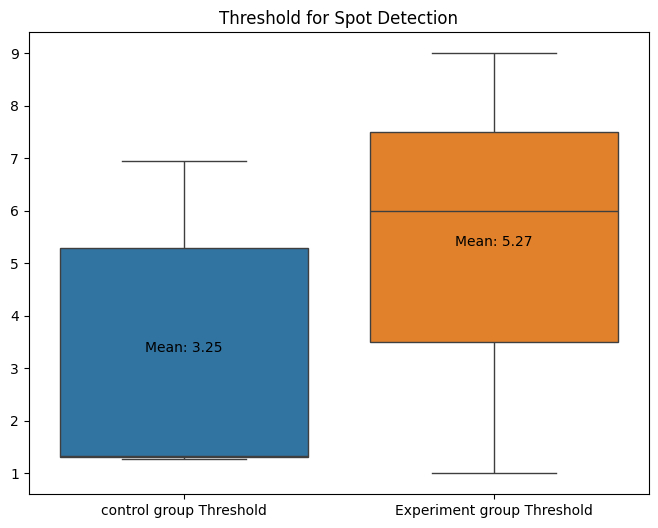

In [28]:
thresholds = [controlThresholdCollection, experimentThresholdCollection[3:]]
labels = ['control group Threshold', "Experiment group Threshold"]
plt.figure(figsize=(8, 6))
sns.boxplot(data=thresholds)

# Add title
plt.title("Threshold for Spot Detection")

# Calculate and annotate mean values
for i, dataset in enumerate(thresholds):
    mean_value = np.mean(dataset)
    plt.text(i, mean_value, f'Mean: {mean_value:.2f}', 
             ha='center', va='bottom', color='black')

# Set x-ticks
plt.xticks(ticks=[0, 1], labels=labels)

# Display the plot
plt.show()

In [9]:
# Create your collection for counterstain group thresholds
if counterstain:
    counterstainThresholdCollection = []
    #  Find all files for your counterstain group
    counterstainsmFISHChannelPaths = find_tif_files(counterstainDirectory, counterstainFileName)
    for i in tqdm(range(len(counterstainsmFISHChannelPaths))):
        # Same as previous code. 
        file_directory = os.path.dirname(counterstainsmFISHChannelPaths[i])
        os.chdir(file_directory)
        create_folder_in_same_directory(".","results")
        os.chdir("results")
        counterstainsmFISHChannel = tifffile.imread(counterstainsmFISHChannelPaths[i])
        # Function to find your spots and threshold 
        counterstain_spots, counterstain_spots_threshold = bigfish.detection.detect_spots(
                images=counterstainsmFISHChannel,
                return_threshold=True,
                voxel_size= voxel_size,  # in nanometer (one value per dimension zyx)
                spot_radius= spot_size, # in nanometer (one value per dimension zyx)
                log_kernel_size= kernel_size,
                minimum_distance= minimal_distance)
        # Plot your elbow curve
        bigfish.plot.plot_elbow(
                images=counterstainsmFISHChannel,
                voxel_size=voxel_size,
                spot_radius=spot_size,
                path_output="Elbow.png",
                show=False)
        # Add your threshold to your collection 
        counterstainThresholdCollection.append(counterstain_spots_threshold)
        # Save the spots here for future works. 
        print("threshold: {0}".format(counterstain_spots_threshold))

  0%|                                                            | 0/16 [00:00<?, ?it/s]

'results' folder already exists at: results


  6%|███▎                                                | 1/16 [00:37<09:26, 37.79s/it]

threshold: 19.636363636363637
'results' folder already exists at: results


 12%|██████▍                                            | 2/16 [07:11<57:41, 247.26s/it]

threshold: 6.222222222222222
'results' folder already exists at: results


 19%|█████████▌                                         | 3/16 [08:53<39:08, 180.64s/it]

threshold: 17.67676767676768
'results' folder already exists at: results


 25%|████████████▊                                      | 4/16 [10:43<30:33, 152.80s/it]

threshold: 8.98989898989899
'results' folder already exists at: results


 31%|███████████████▉                                   | 5/16 [19:40<53:24, 291.32s/it]

threshold: 5.8686868686868685
'results' folder already exists at: results


 38%|███████████████████▏                               | 6/16 [21:36<38:38, 231.87s/it]

threshold: 4.848484848484849
'results' folder already exists at: results


 44%|██████████████████████▎                            | 7/16 [24:40<32:25, 216.15s/it]

threshold: 4.787878787878788
'results' folder already exists at: results


 50%|█████████████████████████▌                         | 8/16 [36:50<50:39, 379.94s/it]

threshold: 13.85858585858586
'results' folder already exists at: results


 56%|████████████████████████████▋                      | 9/16 [44:34<47:23, 406.19s/it]

threshold: 11.555555555555555
'results' folder already exists at: results


 62%|███████████████████████████████▎                  | 10/16 [52:40<43:05, 430.85s/it]

threshold: 7.090909090909091
'results' folder already exists at: results


 69%|█████████████████████████████████               | 11/16 [1:10:22<51:59, 623.97s/it]

threshold: 6.151515151515151
'results' folder already exists at: results


 75%|████████████████████████████████████            | 12/16 [1:19:40<40:14, 603.74s/it]

threshold: 5.03030303030303
'results' folder already exists at: results


 81%|███████████████████████████████████████         | 13/16 [1:29:51<30:17, 605.89s/it]

threshold: 5.797979797979798
'results' folder already exists at: results


 88%|██████████████████████████████████████████      | 14/16 [1:51:16<27:02, 811.14s/it]

threshold: 8.787878787878787
'results' folder already exists at: results


 94%|█████████████████████████████████████████████   | 15/16 [2:04:53<13:32, 812.76s/it]

threshold: 6.363636363636363
'results' folder already exists at: results


100%|████████████████████████████████████████████████| 16/16 [2:15:15<00:00, 507.21s/it]

threshold: 19.28282828282828


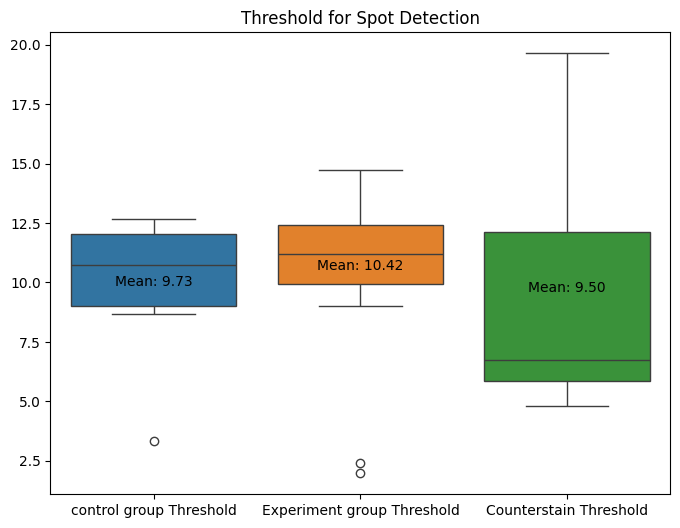

In [10]:
thresholds = [controlThresholdCollection, experimentThresholdCollection, counterstainThresholdCollection]
labels = ['control group Threshold', "Experiment group Threshold", "Counterstain Threshold"]
plt.figure(figsize=(8, 6))
sns.boxplot(data=thresholds)

# Add title
plt.title("Threshold for Spot Detection")

# Calculate and annotate mean values
for i, dataset in enumerate(thresholds):
    mean_value = np.mean(dataset)
    plt.text(i, mean_value, f'Mean: {mean_value:.2f}', 
             ha='center', va='bottom', color='black')

# Set x-ticks
plt.xticks(ticks=[0, 1, 2], labels=labels)

# Display the plot
plt.show()

In [11]:
# Create your collection for counterstain group thresholds
if counterstain:
    counterstainControlThresholdCollection = []
    #  Find all files for your counterstain group
    counterstainControlsmFISHChannelPaths = find_tif_files(controlDirectory, counterstainFileName)
    for i in tqdm(range(len(counterstainControlsmFISHChannelPaths))):
        # Same as previous code. 
        file_directory = os.path.dirname(counterstainControlsmFISHChannelPaths[i])
        os.chdir(file_directory)
        create_folder_in_same_directory(".","results")
        os.chdir("results")
        counterstainControlsmFISHChannel = tifffile.imread(counterstainControlsmFISHChannelPaths[i])
        # Function to find your spots and threshold 
        counterstainControl_spots, counterstainControl_spots_threshold = bigfish.detection.detect_spots(
                images=counterstainControlsmFISHChannel,
                return_threshold=True,
                voxel_size= voxel_size,  # in nanometer (one value per dimension zyx)
                spot_radius= spot_size, # in nanometer (one value per dimension zyx)
                log_kernel_size= kernel_size,
                minimum_distance= minimal_distance)
        # Plot your elbow curve
        bigfish.plot.plot_elbow(
                images=counterstainControlsmFISHChannel,
                voxel_size=voxel_size,
                spot_radius=spot_size,
                path_output="Elbow.png",
                show=False)
        # Add your threshold to your collection 
        counterstainControlThresholdCollection.append(counterstainControl_spots_threshold)
        # Save the spots here for future works. 
        print("threshold: {0}".format(counterstainControl_spots_threshold))

  0%|                                                             | 0/6 [00:00<?, ?it/s]

'results' folder already exists at: results


 17%|████████▊                                            | 1/6 [01:10<05:53, 70.74s/it]

threshold: 8.98989898989899
'results' folder already exists at: results


 33%|█████████████████▋                                   | 2/6 [02:08<04:12, 63.25s/it]

threshold: 19.151515151515152
'results' folder already exists at: results


 50%|██████████████████████████▌                          | 3/6 [03:39<03:47, 75.83s/it]

threshold: 5.797979797979798
'results' folder already exists at: results


 67%|███████████████████████████████████▎                 | 4/6 [04:28<02:10, 65.41s/it]

threshold: 5.545454545454545
'results' folder already exists at: results


 83%|████████████████████████████████████████████▏        | 5/6 [05:34<01:05, 65.52s/it]

threshold: 4.96969696969697
'results' folder already exists at: results


100%|█████████████████████████████████████████████████████| 6/6 [06:41<00:00, 66.92s/it]

threshold: 5.2727272727272725


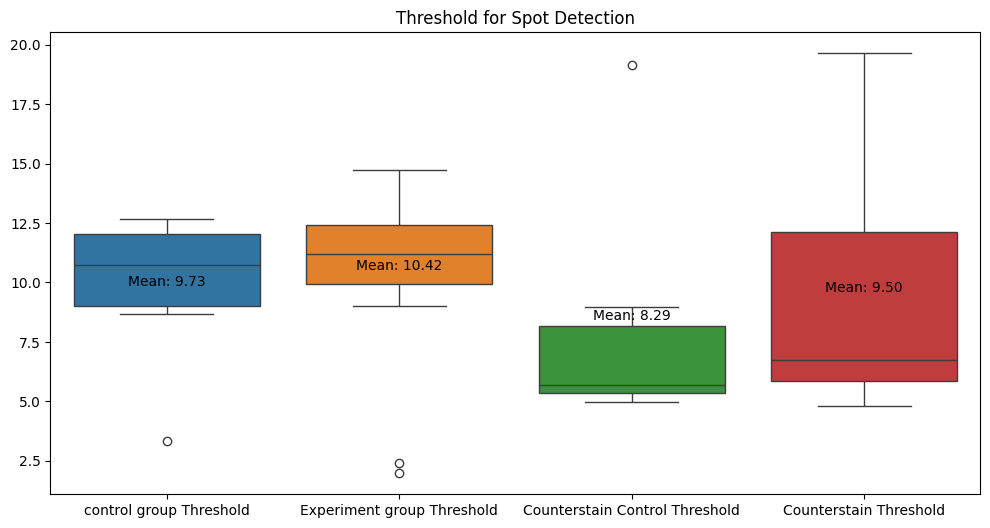

In [16]:
thresholds = [controlThresholdCollection, experimentThresholdCollection, counterstainControlThresholdCollection, counterstainThresholdCollection]
labels = ['control group Threshold', "Experiment group Threshold", "Counterstain Control Threshold", "Counterstain Threshold"]
plt.figure(figsize=(12, 6))
sns.boxplot(data=thresholds)

# Add title
plt.title("Threshold for Spot Detection")

# Calculate and annotate mean values
for i, dataset in enumerate(thresholds):
    mean_value = np.mean(dataset)
    plt.text(i, mean_value, f'Mean: {mean_value:.2f}', 
             ha='center', va='bottom', color='black')

# Set x-ticks
plt.xticks(ticks=[0, 1, 2, 3], labels=labels)
plt.savefig("thresholds.png")
# Display the plot
plt.show()

In [14]:
os.getcwd()

'/Users/eliasguan/Desktop/EG_0920_Test_wnt1_incision_amputation/Experiment_dataset/control/0h_incision_Image1/633/results'

In [15]:
plt.savefig("thresholds.png")

<Figure size 640x480 with 0 Axes>